In [1]:
import os
os.chdir('..')

In [2]:
import networkx as nx
from RobotGraphModel import RobotGraph
import gym
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from pygraphviz import *

home = str(Path.home())

In [3]:
# env_name = 'FetchReachEnvGraph-v0'
# model_path = home + '/Documents/SAC_GCN/CustomGymEnvs/envs/fetchreach/CustomFetchReach/assets/fetch/robot.xml'
# fig_size=(30, 10)
# edge_label_proc = lambda j: ' '.join(j.attrib['name'].split(':')[1].split('_'))

# env_name = 'AntEnvGraph-v0'
# model_path = home + '/Documents/SAC_GCN/CustomGymEnvs/envs/ant/xml/AntEnv_v0_Normal.xml'
# fig_size = (15, 7)
# edge_label_proc = lambda j: ' '.join(j.attrib['name'].split('_'))

env_name = 'HalfCheetahEnvGraph-v0'
model_path = home + '/Documents/SAC_GCN/CustomGymEnvs/envs/halfcheetah/HalfCheetahEnv-v0/half_cheetah.xml'
fig_size = (15, 7)
edge_label_proc = lambda j: ' '.join(j.attrib['name'].split('_'))

# env_name = 'Walker2dEnvGraph-v0'
# model_path = home + '/Documents/SAC_GCN/CustomGymEnvs/envs/halfcheetah/HalfCheetahEnv-v0/half_cheetah.xml'
# fig_size = (15, 7)
# edge_label_proc = lambda j: ' '.join(j.attrib['name'].split('_'))


In [4]:
env = gym.make(env_name)
rg = env.robot_graph 

for i in range(len(rg.node_list)):
    print(i, rg.node_list[i].attrib['name'])

print()
for edge, joint in rg.edge_list.items():
    if len(joint) > 0:
        print(edge, [j.attrib['name'] for j in joint])
    else:
        print(edge,  joint.attrib['name'])
    
nodelist = [i for i in range(len(rg.node_list))]
edgelist = [(f, t) for f, t in zip(rg.edges_from, rg.edges_to)]
g = nx.Graph()
g.add_nodes_from(nodelist)

# use PyGraphviz to create the initial graph with lengths
g = AGraph()
g.add_nodes_from(nodelist)

for edge, j in zip(edgelist, rg.edge_list):
    if j is not None:
        g.add_edge(edge[0], edge[1], length=3)
    else:
        g.add_edge(edge[0], edge[1], length=1)    
        
# convert to NetworkX Graph from a PyGraphviz graph
g = nx.nx_agraph.from_agraph(g)
pos = nx.nx_agraph.graphviz_layout(g)

0 world
1 fthigh
2 bfoot
3 bshin
4 ffoot
5 torso
6 bthigh
7 fshin

(5, 0) ['rootx', 'rootz', 'rooty']
(6, 5) ['bthigh']
(3, 6) ['bshin']
(2, 3) ['bfoot']
(1, 5) ['fthigh']
(7, 1) ['fshin']
(4, 7) ['ffoot']


[(5, 0), (6, 5), (3, 6), (2, 3), (1, 5), (7, 1), (4, 7)]


AttributeError: 'tuple' object has no attribute 'attrib'

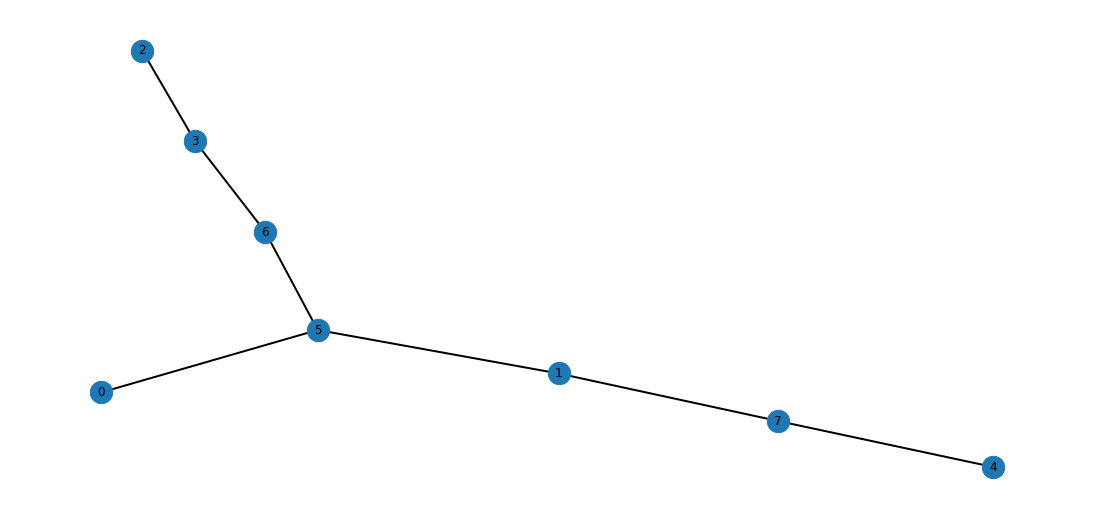

In [5]:
print(edgelist)
plt.figure(figsize=fig_size)
nx.draw(g,pos,width=2,linewidths=1,\
node_size=500, with_labels=True, labels={node:node for node in g.nodes()})
nx.draw_networkx_edge_labels(g,pos,
                edge_labels={(f'{edge[0]}', f'{edge[1]}'): edge_label_proc(j)  if j is not None else 'w' 
                             for edge, j in zip(edgelist, rg.edge_list)},font_color='dodgerblue', font_size=18)
plt.axis('off')
plt.savefig(f'{env_name}.jpg', dpi=300)
plt.show()

In [ ]:
env = gym.make(env_name)
rg = env.robot_graph
nodelist = [env.sim.model.body_name2id(n.attrib['name']) for n in rg.node_list]
edgelist = [(env.sim.model.body_name2id(rg.node_list[f].attrib['name']), env.sim.model.body_name2id(rg.node_list[t].attrib['name'])) for f, t in zip(rg.edges_from, rg.edges_to)]
g = nx.Graph()
g.add_nodes_from(nodelist)

for edge, j in zip(edgelist, rg.edge_list):
    if j is not None:
        g.add_edge(edge[0], edge[1], length=5)
    else:
        g.add_edge(edge[0], edge[1], length=1)    
    
# g.add_edges_from(edgelist, length=10)
pos = nx.spring_layout(g)

In [ ]:
plt.figure(figsize=(10, 15))
nx.draw(g,pos,edge_color='black',width=2,linewidths=1,\
node_size=500,node_color='cyan',alpha=0.9,\
labels={node:node for node in g.nodes()})
# nx.draw_networkx_edge_labels(g,pos,edge_labels={edge: 'j' if kind is not None else 'w' for edge, kind in zip(edgelist, rg.edge_list)},font_color='red')
nx.draw_networkx_edge_labels(g,pos,edge_labels={edge: np.round(rg.edge_features[i, :], 3) for edge, i in zip(edgelist, range(rg.edge_features.shape[0]))},font_color='red')

plt.axis('off')
plt.savefig(f'{env_name}.jpg', dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10, 15))
nx.draw(g,pos,edge_color='black',width=2,linewidths=1,\
node_size=500,node_color='pink',alpha=0.9,\
labels={node:node for node in g.nodes()})

nx.draw_networkx_edge_labels(g,pos,edge_labels={edge: rg.sim.model.joint_name2id(j.attrib['name']) if j is not None else 'w' for edge, j in zip(edgelist, rg.edge_list)},font_color='red')
plt.axis('off')
plt.show()
plt.savefig(f'{env_name}.jpg', dpi=300)